In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from datetime import datetime


import seaborn as sns

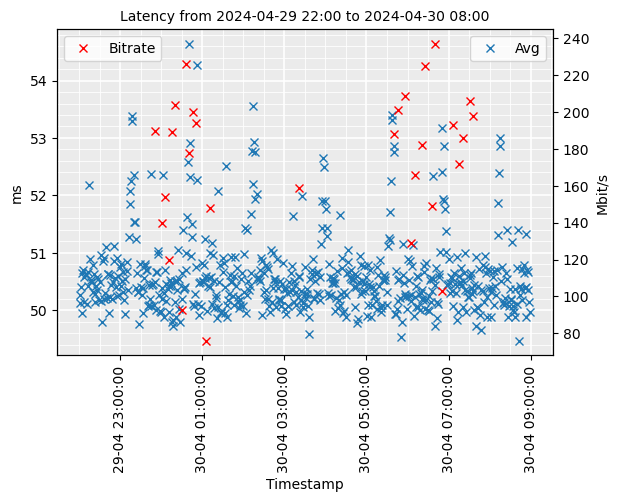

In [60]:
file1 = 'ping.csv'
file2 = 'downlink_receiver.csv'

df1 = pd.read_csv(file1)
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df1 = df1.set_index('Timestamp')

df2 = pd.read_csv(file2)
df2['timestamp'] = pd.to_datetime(df2['timestamp'])
df2 = df2.set_index('timestamp')

dateBegin1 = '2024-04-29 22'
dateEnd1 = '2024-04-30 08'
dateBegin1_obj = datetime.strptime(dateBegin1, '%Y-%m-%d %H')
dateBegin1_str = dateBegin1_obj.strftime('%Y-%m-%d %H:%M')
dateEnd1_obj = datetime.strptime(dateEnd1, '%Y-%m-%d %H')
dateEnd1_str = dateEnd1_obj.strftime('%Y-%m-%d %H:%M')

date_range1 = df1.loc[dateBegin1:dateEnd1]
date_range2 = df2.loc[dateBegin1:dateEnd1]

latency = pd.to_numeric(date_range1['Avg'])
bitrate = pd.to_numeric(date_range2['bitrate'])

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

latency.plot(ax=ax1,ls='', marker='x')
bitrate.plot(ax=ax2,ls='', marker='x', color='r')


#set ticks every week
#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
title_str = f'Latency from {dateBegin1_str} to {dateEnd1_str}'

ax1.set_ylabel('ms')
ax2.set_ylabel('Mbit/s')
plt.title(title_str, fontsize=10)
ax1.set_facecolor('#EBEBEB')
ax1.grid(which='major', color='white', linewidth=1.2)
ax1.grid(which='minor', color='white', linewidth=0.6)
ax1.minorticks_on()
ax1.legend(['Avg'])
ax2.legend(['Bitrate'],loc=2)

ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
for label in ax1.get_xticklabels():
    label.set_rotation(90)  # Rotate 90 degrees
    label.set_horizontalalignment('center')
#ax.xaxis.set_major_locator(ticker.MultipleLocator(0.009)) 
ax1.tick_params(which='minor', bottom=False, left=False)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M:%S'))

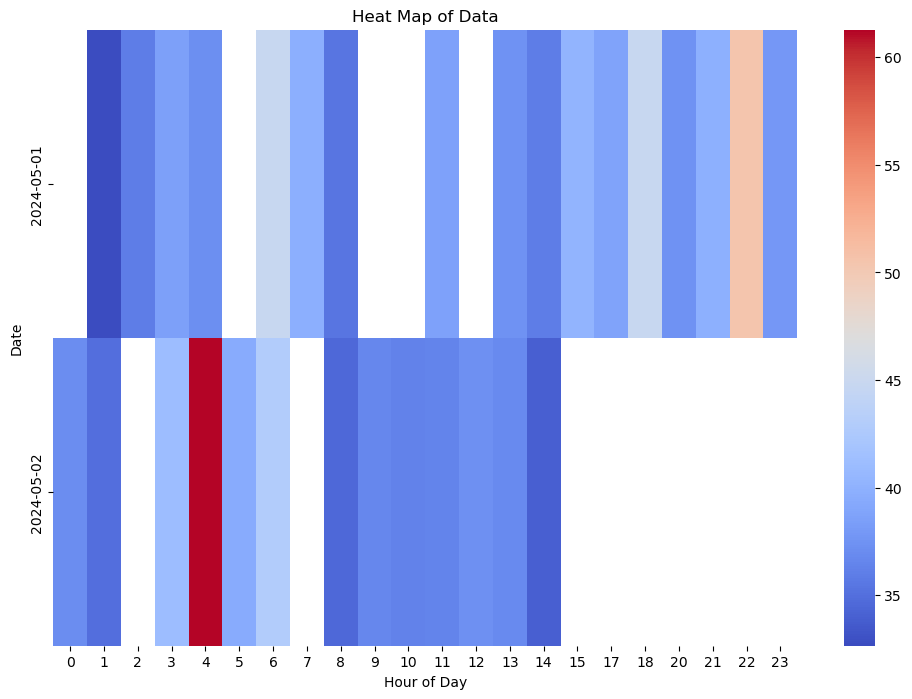

In [18]:

df1_grouped = date_range1.resample('H').mean()


pivot_table = df1_grouped.pivot_table(index=df1_grouped.index.date, columns=df1_grouped.index.hour, values='Avg')


plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm')


plt.title('Heat Map of Data')
plt.xlabel('Hour of Day')
plt.ylabel('Date')


plt.show()